In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
traffic=pd.read_csv('traffic_data.csv')

In [2]:
traffic.index

RangeIndex(start=0, stop=105106, step=1)

In [3]:
traffic.head()

,Station Times,Station count 1,Station count 2,Station count 3,Station count 4,Station count 5,Station count 6,Station count 7,Station count 8,Station count 9,Station count 10
0,1/1/2017 0:00,45,82,62,102,50,98,48,65,62,96
1,1/1/2017 0:05,39,66,60,109,54,119,52,65,48,70
2,1/1/2017 0:10,35,92,87,99,80,135,74,65,47,110
3,1/1/2017 0:15,67,136,120,111,136,165,76,83,59,154
4,1/1/2017 0:20,104,160,148,103,122,195,91,91,83,263


In [4]:
traffic.columns=['datetime','station_1','station_2','station_3','station_4','station_5','station_6','station_7','station_8','station_9','station_10']

In [5]:
traffic['datetime']=pd.to_datetime(traffic['datetime'])
traffic1 = traffic

In [6]:
traffic=traffic.set_index('datetime')

# traffic1=pd.read_csv('traffic_data.csv')

In [7]:
traffic.head()

,station_1,station_2,station_3,station_4,station_5,station_6,station_7,station_8,station_9,station_10
datetime,,,,,,,,,,
2017-01-01 00:00:00,45,82,62,102,50,98,48,65,62,96
2017-01-01 00:05:00,39,66,60,109,54,119,52,65,48,70
2017-01-01 00:10:00,35,92,87,99,80,135,74,65,47,110
2017-01-01 00:15:00,67,136,120,111,136,165,76,83,59,154
2017-01-01 00:20:00,104,160,148,103,122,195,91,91,83,263


In [46]:
# traffic1.columns=['datetime','station_1','station_2','station_3','station_4','station_5','station_6','station_7','station_8','station_9','station_10']
# traffic1.head()
# traffic1['datetime']=pd.to_datetime(traffic1['datetime'])

In [6]:
traffic.head()

,station_1,station_2,station_3,station_4,station_5,station_6,station_7,station_8,station_9,station_10
datetime,,,,,,,,,,
2017-01-01 00:00:00,45,82,62,102,50,98,48,65,62,96
2017-01-01 00:05:00,39,66,60,109,54,119,52,65,48,70
2017-01-01 00:10:00,35,92,87,99,80,135,74,65,47,110
2017-01-01 00:15:00,67,136,120,111,136,165,76,83,59,154
2017-01-01 00:20:00,104,160,148,103,122,195,91,91,83,263


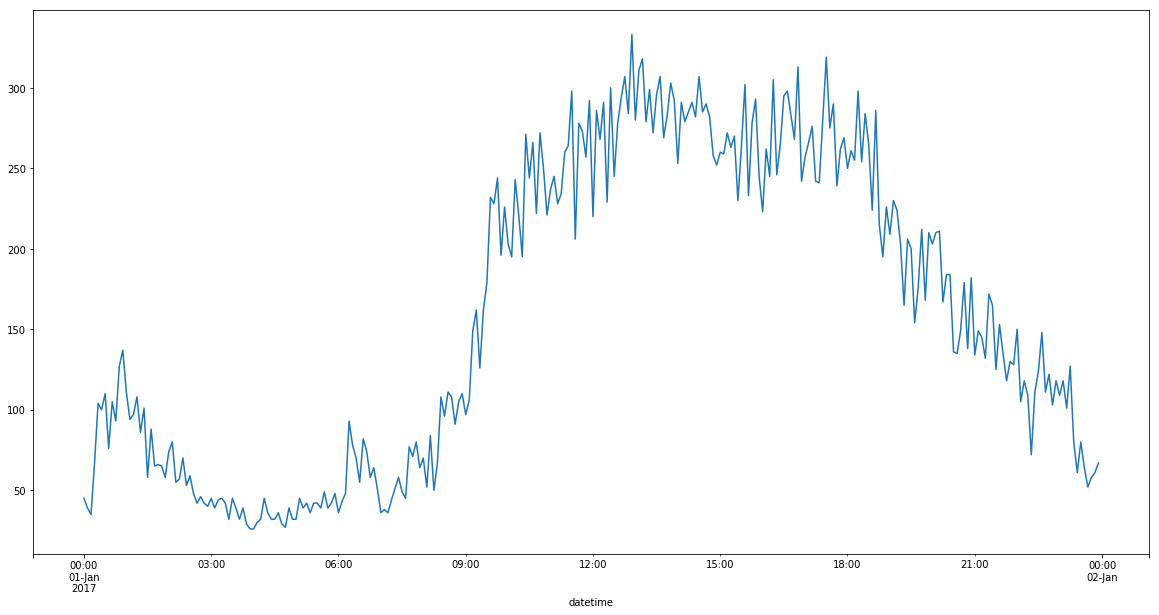

In [10]:
traffic['2017-01-01']['station_1'].plot(figsize=(20,10))

In [8]:
traffic['station_1'].describe()

count    105106.000000
mean        227.998668
std         119.944967
min           0.000000
25%         114.000000
50%         255.000000
75%         327.000000
max         687.000000
Name: station_1, dtype: float64

Text(0.5,1,'Time Series of station count by date time of search')

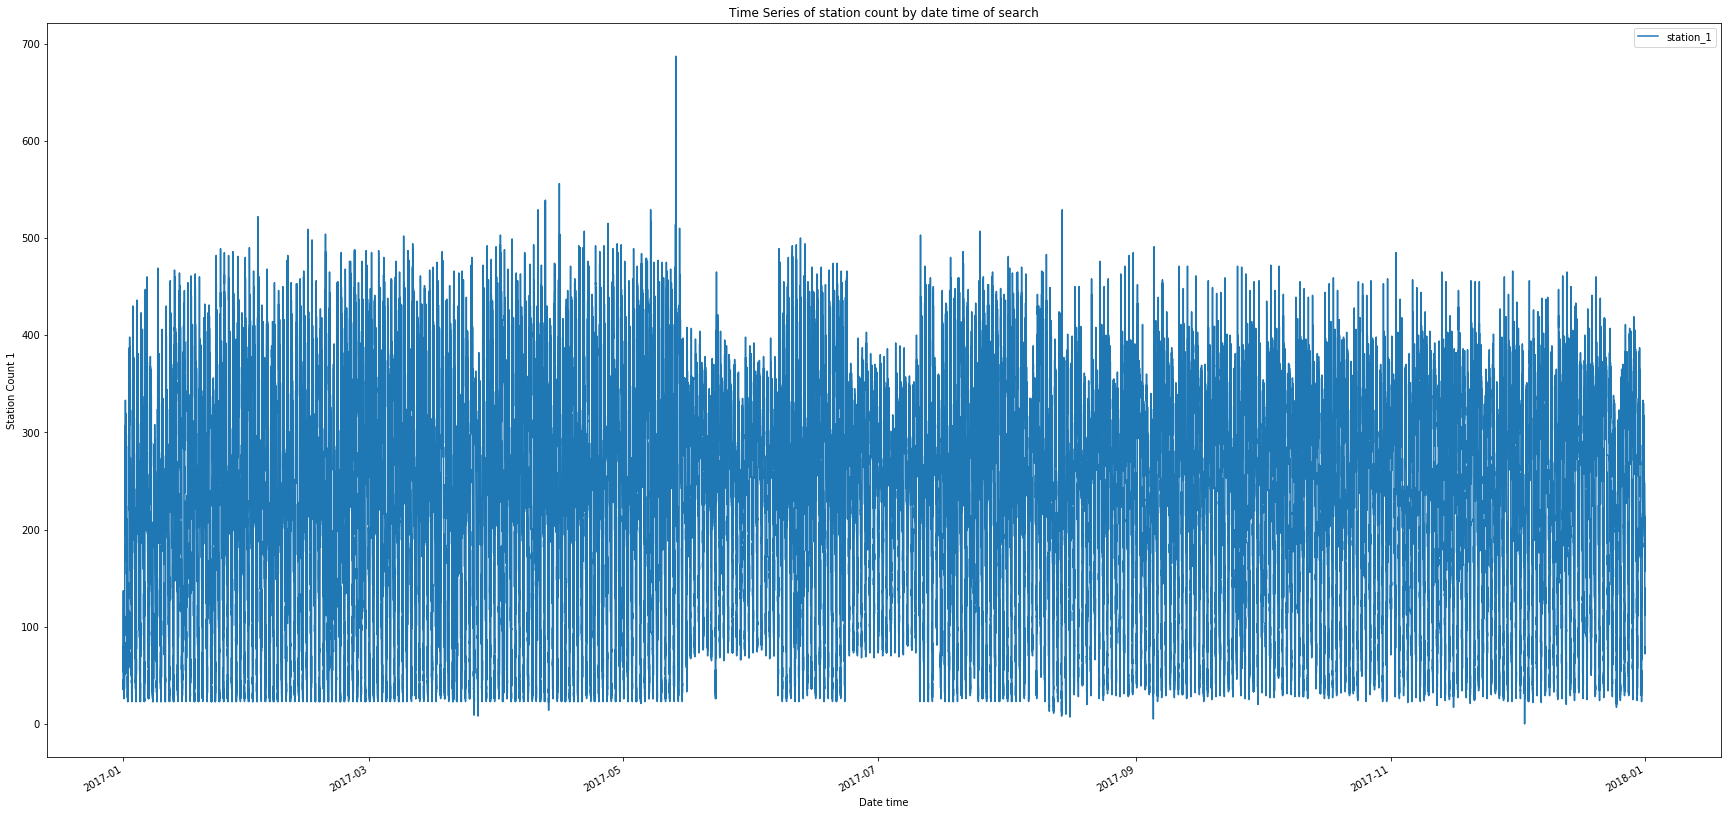

In [9]:
traffic.plot( y='station_1', figsize=(30,15))
plt.xlabel('Date time')
plt.ylabel('Station Count 1')
plt.title('Time Series of station count by date time of search')

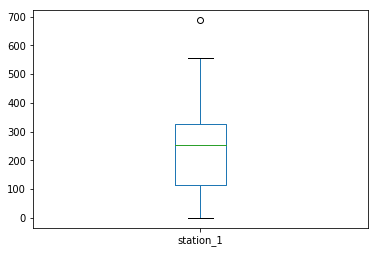

In [12]:
traffic['station_1'].plot(kind='box')
plt.show()

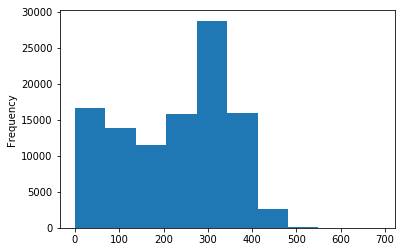

In [13]:
traffic['station_1'].plot(kind='hist')
plt.show()

In [15]:
print('Minimum :' + str(traffic['station_1'].min()))
print('Maximum :' + str(traffic['station_1'].max()))

Minimum :0
Maximum :687


In [15]:
# convert to numpy array
import scipy as sp
#traffic_np=traffic['station_1'].values
traffic_np=traffic['station_1']

In [36]:
traffic_np = traffic_np.reshape(-1, 1)
#traffic_np = traffic_np.astype('float64')
#traffic_np.head()

In [21]:
from scipy.cluster.vq import kmeans

In [2]:
from sklearn.cluster import KMeans

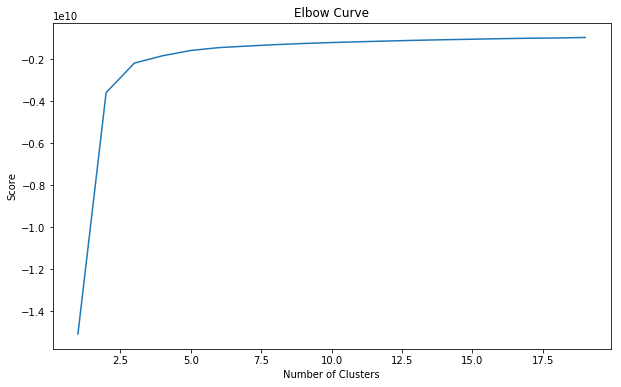

In [11]:
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(traffic) for i in n_cluster]
scores = [kmeans[i].score(traffic) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [18]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [48]:
#data= traffic_np
#data = traffic[['station_1', "station_2", "station_3"]]
data=traffic1[['station_1']]
data=data.values
print (data.shape)
#data=data.reshape(-1,1)
data.astype(float)

(105106, 1)


array([[45.],
       [39.],
       [35.],
       ...,
       [93.],
       [72.],
       [79.]])

KeyError: "None of [['datetime', 'station_1']] are in the [columns]"

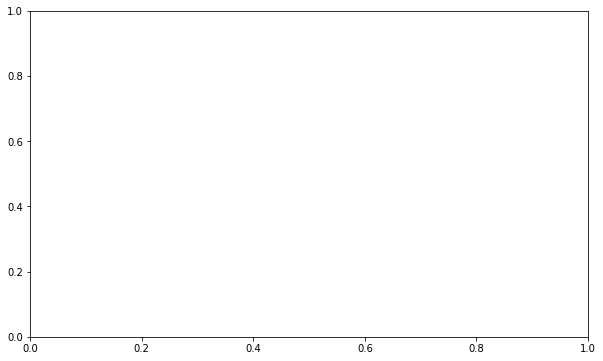

In [50]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination= 0.01)
model.fit(data) 
data['anomaly2'] = pd.Series(model.predict(data))

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = data.loc[data['anomaly2'] == -1, ['datetime','station_1']] #anomaly

ax.plot(data['datetime'], data['station_1'], color='blue', label = 'Normal')
ax.scatter(a['datetime'],a['station_1'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [19]:
#work from my side. Used the below two links 
#https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection
#https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea
#traffic - datetime set as Index.
#traffic1 - datetime index not set.

#first, we will try to create some extra features from the data we have.
traffic1['hours'] = traffic1['datetime'].dt.hour
traffic1["DayOfTheWeek"] = traffic1['datetime'].dt.dayofweek
#Monday = 0, Sunday = 6 and so on

In [20]:
traffic1.head()

,datetime,station_1,station_2,station_3,station_4,station_5,station_6,station_7,station_8,station_9,station_10,hours,DayOfTheWeek
0,2017-01-01 00:00:00,45,82,62,102,50,98,48,65,62,96,0,6
1,2017-01-01 00:05:00,39,66,60,109,54,119,52,65,48,70,0,6
2,2017-01-01 00:10:00,35,92,87,99,80,135,74,65,47,110,0,6
3,2017-01-01 00:15:00,67,136,120,111,136,165,76,83,59,154,0,6
4,2017-01-01 00:20:00,104,160,148,103,122,195,91,91,83,263,0,6


In [21]:
traffic1['daylight'] = ((traffic1['hours'] >= 7) & (traffic1['hours'] <= 19)).astype(int)

In [22]:
#Basically its 1 if its a weekday and 0 if not.
traffic1['WeekDay'] = (traffic1['DayOfTheWeek'] < 5).astype(int)

In [23]:
traffic1.head()

,datetime,station_1,station_2,station_3,station_4,station_5,station_6,station_7,station_8,station_9,station_10,hours,DayOfTheWeek,daylight,WeekDay
0,2017-01-01 00:00:00,45,82,62,102,50,98,48,65,62,96,0,6,0,0
1,2017-01-01 00:05:00,39,66,60,109,54,119,52,65,48,70,0,6,0,0
2,2017-01-01 00:10:00,35,92,87,99,80,135,74,65,47,110,0,6,0,0
3,2017-01-01 00:15:00,67,136,120,111,136,165,76,83,59,154,0,6,0,0
4,2017-01-01 00:20:00,104,160,148,103,122,195,91,91,83,263,0,6,0,0


In [39]:
#setting up the outlier fraction
outlier_fraction = 0.01

In [25]:
#I'm only starting it for station_1, but then 
data = traffic1[['station_1', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]


In [28]:
#the necessary imports
#import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [30]:
# Take useful feature and standardize them
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 2 importants features. try 3 and see
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [36]:
data.head()

,0,1
0,2.030941,1.124844
1,2.054137,1.119382
2,2.069600,1.115740
3,1.945891,1.144874
4,1.802853,1.178561


In [31]:
#from the above elbow curve we pick n_clusters = 15
kmeans = KMeans(n_clusters = 15).fit(data)

In [32]:
scores = kmeans.score(data)

In [33]:
traffic1['cluster'] = kmeans.predict(data)
traffic1['principal_feature1'] = data[0]
traffic1['principal_feature2'] = data[1]
traffic1['cluster'].value_counts()
#here, it basically means that cluster 6 - has 8766 datapoints in it.

6     8766
3     8463
0     8378
4     8100
14    8000
12    7991
8     7906
9     7177
7     6598
1     6596
10    6465
11    6402
2     5801
13    5259
5     3204
Name: cluster, dtype: int64

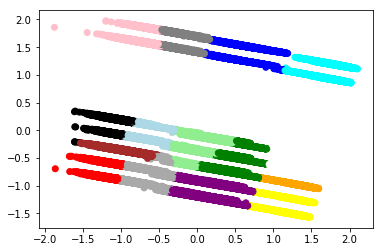

In [35]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(traffic1['principal_feature1'], traffic1['principal_feature2'], c=traffic1["cluster"].apply(lambda x: colors[x]))
plt.show()

In [37]:
# get the distance between each point and its nearest centroid. 
#The biggest distances are considered as anomaly.
#return Series(list) of distance between each point and his distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

In [38]:
distance = getDistanceByPoint(data, kmeans)

/home/saiteja/.conda/envs/agordia/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [66]:
outlier_fraction = 0.01
number_of_outliers = int(outlier_fraction*len(distance))
print (number_of_outliers)

1051


In [67]:
threshold = distance.nlargest(number_of_outliers).min()
print (threshold)

3.0334409477826925


In [68]:
traffic1['anomaly_cluster'] = (distance >= threshold).astype(int)

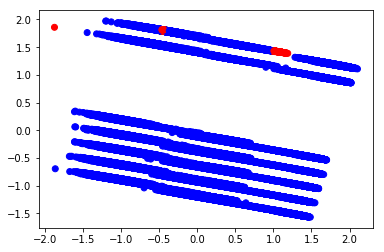

In [69]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(traffic1['principal_feature1'], traffic1['principal_feature2'], c=traffic1["anomaly_cluster"].apply(lambda x: colors[x]))
plt.show()

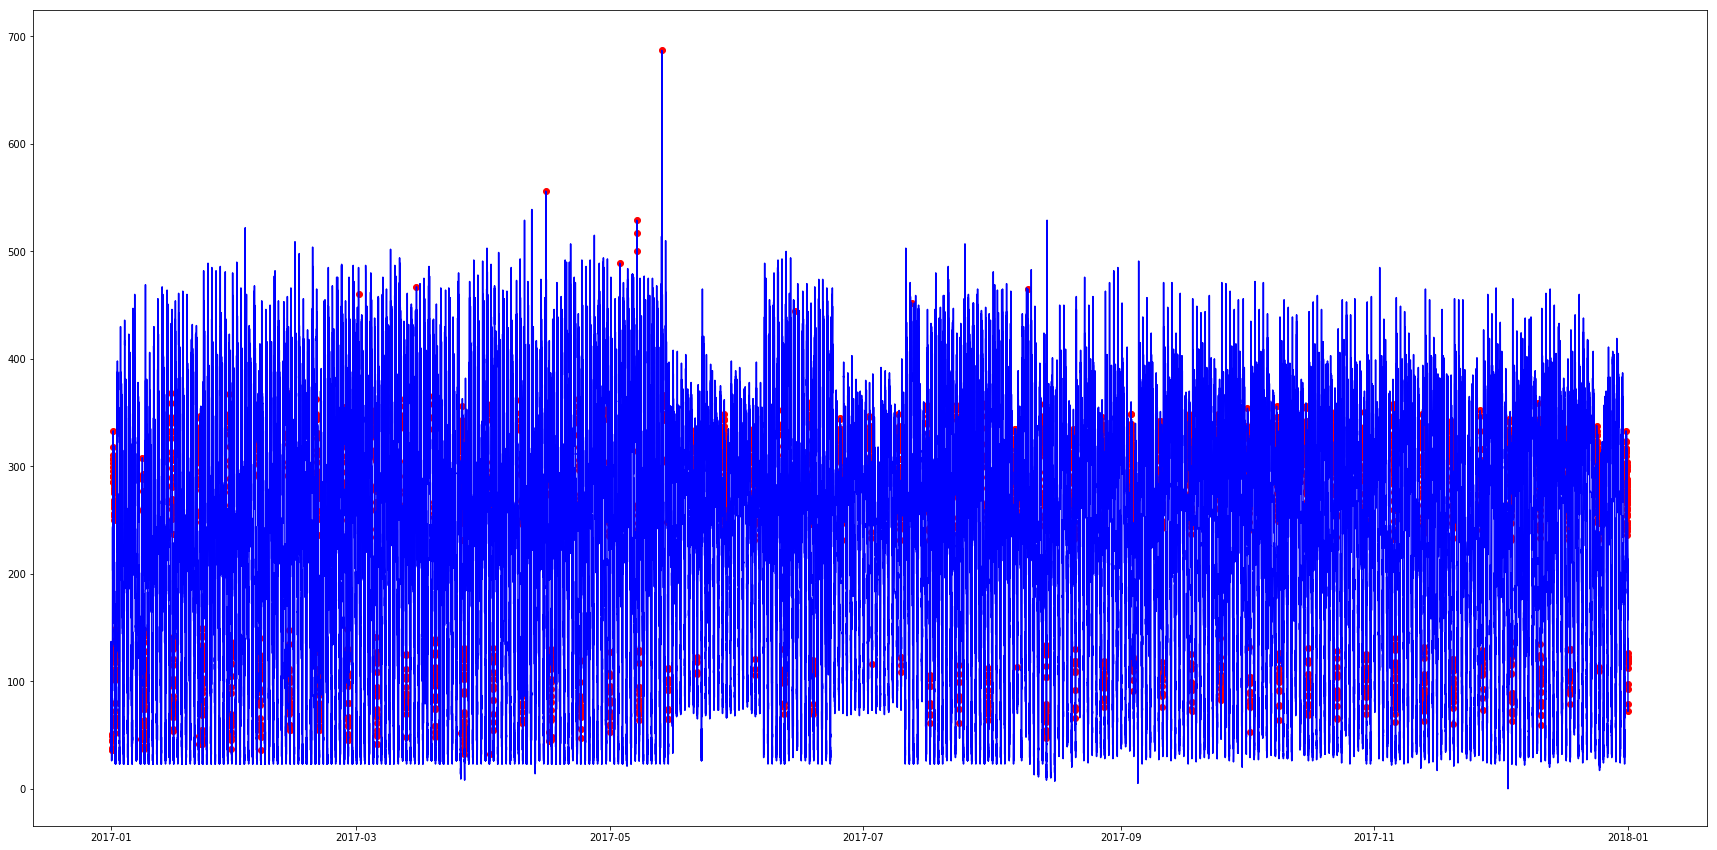

In [55]:
# visualisation of anomaly throughout time
fig, ax = plt.subplots( figsize=(30,15))

a = traffic1.loc[traffic1['anomaly_cluster'] == 1, ['datetime', 'station_1']] #anomaly

ax.plot(traffic1['datetime'], traffic1['station_1'], color='blue')
ax.scatter(a['datetime'],a['station_1'], color='red')
plt.show()


In [56]:
#Isolation Forest
#I'm only starting it for station_1, but then 
data = traffic1[['station_1', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]


In [61]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination =  0.01)
model.fit(data)
# add the data to the main  
traffic1['anomaly_isolation'] = pd.Series(model.predict(data))
traffic1['anomaly_isolation'] = traffic1['anomaly_isolation'].map( {1: 0, -1: 1} )
print(traffic1['anomaly_isolation'].value_counts())

/home/saiteja/.local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/saiteja/.local/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


0    104055
1      1051
Name: anomaly_isolation, dtype: int64


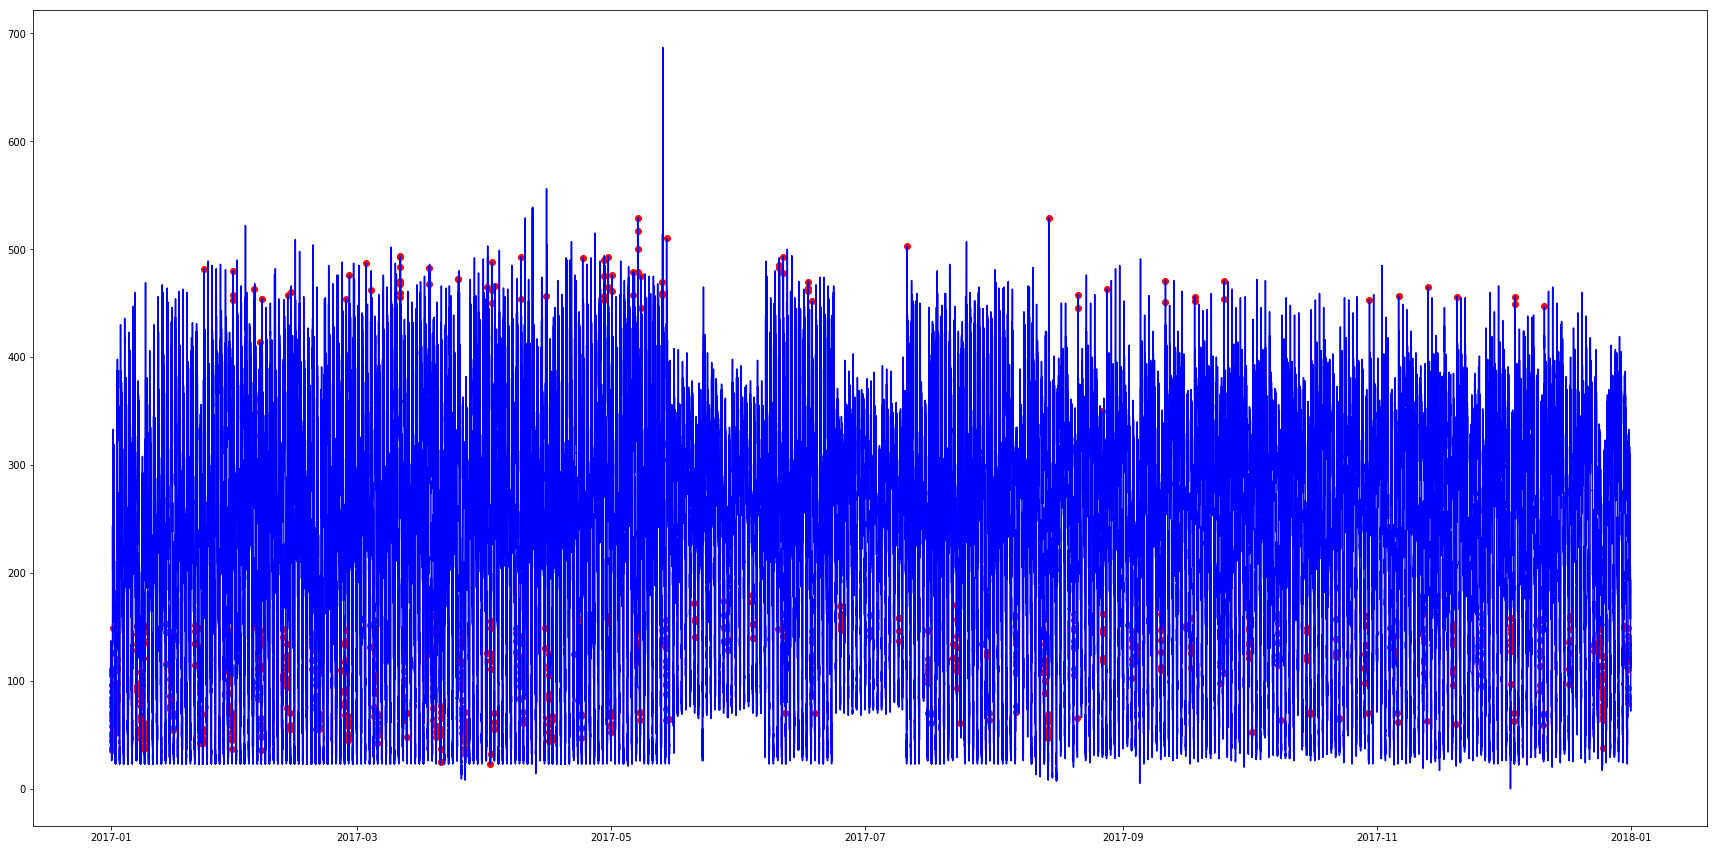

In [62]:
fig, ax = plt.subplots(figsize=(30,15))

a = traffic1.loc[traffic1['anomaly_isolation'] == 1, ['datetime', 'station_1']] #anomaly

ax.plot(traffic1['datetime'], traffic1['station_1'], color='blue')
ax.scatter(a['datetime'],a['station_1'], color='red')
plt.show()

In [63]:
#OneClassSVM
#I'm only starting it for station_1, but then you can extend it for all things.
data = traffic1[['station_1', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
outlier_fraction = 0.01

In [64]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
# train one class SVM 
model =  OneClassSVM(nu=0.95 * outlier_fraction) #nu=0.95 * outliers_fraction  + 0.05
data = pd.DataFrame(np_scaled)
model.fit(data)
# add the data to the main  
traffic1['anomaly_svm'] = pd.Series(model.predict(data))
traffic1['anomaly_svm'] = traffic1['anomaly_svm'].map( {1: 0, -1: 1} )
print(traffic1['anomaly_svm'].value_counts())

0    102099
1      3007
Name: anomaly_svm, dtype: int64


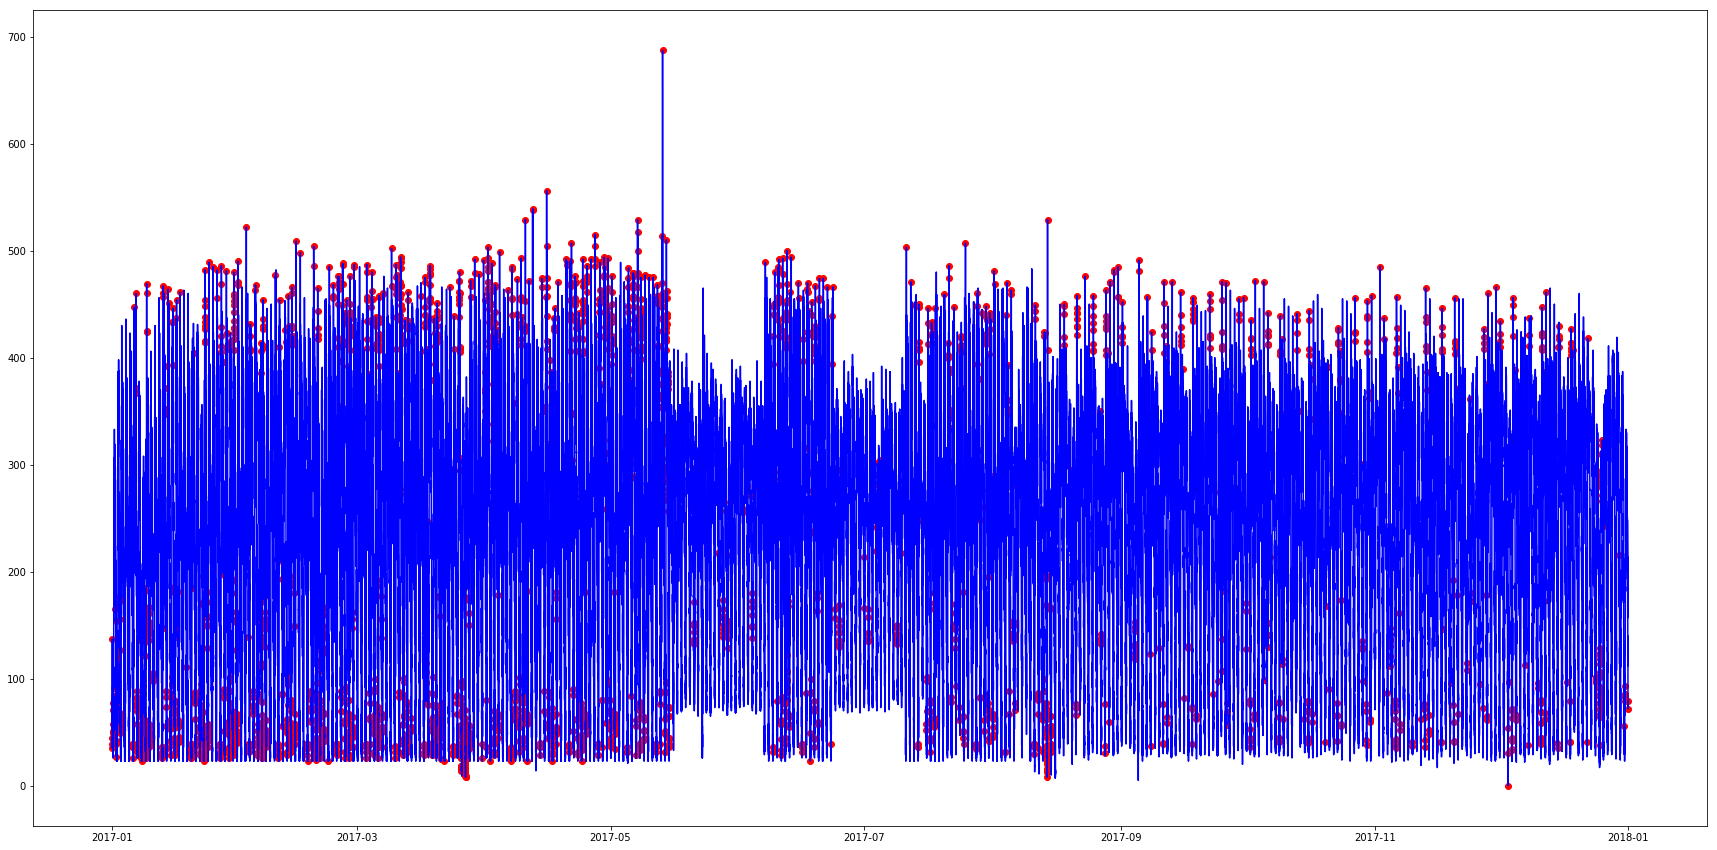

In [65]:
fig, ax = plt.subplots(figsize=(30,15))

a = traffic1.loc[traffic1['anomaly_svm'] == 1, ['datetime', 'station_1']] #anomaly

ax.plot(traffic1['datetime'], traffic1['station_1'], color='blue')
ax.scatter(a['datetime'],a['station_1'], color='red')
plt.show()

In [70]:
# the count of points that all 3 methods decided as anomalies
len(traffic1[(traffic1['anomaly_cluster']==1) & (traffic1['anomaly_isolation']==1) & (traffic1['anomaly_svm']==1)])

170

In [ ]:
#lets try train test split